# Simulacija kretanja projektila kroz tornado

**Autor:** Luka Matić

**Datum:** Avgust 2025.


In [13]:
from pylab import *
from mpl_toolkits.mplot3d import Axes3D

# Konstante:
masa = 0.25                     # masa [kg]
precnik = 0.030                 # prečnik [m]
gustina = 1.293                 # gustina vazduha [kg/m^3]
D = 3.0 * gustina * precnik**2  # koeficijent otpora
Dnorm = D / masa                # normalizovan koeficijent otpora
gSila = array([0.0, 0.0, 9.8])  # gravitaciona sila (usmerena nadole)
u0 = 50.0                       # maksimalna brzina vetra [m/s]
radijus = 5.0                   # radijus tornada [m]

# Početni uslovi:
r0 = array([0.0, 0.0, 0.0])         # pozicija: iz centra tornada, sa zemlje
v0 = array([0.0, 0.0, 100.0])       # brzina: vertikalno na gore (z-osom)

vreme = 10.0
vremenskiKorak = 0.001
n = int(round(vreme / vremenskiKorak))

In [11]:
# Inicijalizacija vektora:
r = zeros((n, 3), float)
v = zeros((n, 3), float)
a = zeros((n, 3), float)
t = zeros(n, float)

# Početne vrednosti
r[0] = r0
v[0] = v0
i = 0

In [12]:
# Glavna petlja: računa kretanje dok projektil ne padne nazad na zemlju (z >= 0)
while (r[i,2] >= 0.0) and (i < n - 1):
    rr = norm(r[i,0:2])  # udaljenost od centra (samo x i y komponente)

    # Brzina vetra u tangencijalnom smeru
    if rr > radijus:
        U = u0 * (radijus / rr)
    else:
        U = u0 * (rr / radijus)

    # Tangencijalni pravac (vetar u tornado rotaciji)
    if rr == 0:
        u = array([0.0, 0.0, 0.0])  # u centru tornada vetar nema pravac
    else:
        u = U * array([-r[i,1] / rr, r[i,0] / rr, 0.0])

    # Relativna brzina (projektil u odnosu na vetar)
    relativnaBrzina = v[i] - u

    # Ukupno ubrzanje: gravitacija + otpor
    aa = -gSila - Dnorm * norm(relativnaBrzina) * relativnaBrzina

    # Ojler-Kromerova metoda
    a[i] = aa
    v[i+1] = v[i] + vremenskiKorak * aa
    r[i+1] = r[i] + vremenskiKorak * v[i]
    t[i+1] = t[i] + vremenskiKorak

    if i % 1000 == 0:
        print(f"i = {i}, z = {r[i,2]:.2f}")
        print(f"t = {round(t[i], 1)} s")
       	print(f"|v| = {round(norm(v[i]), 1)} m/s")
        print(f"|a| = {round(norm(a[i]), 1)} m/s²")
        print("-" * 30)

    i += 1

# Vraćanje tačnog broja koraka
imax = i
ii = r_[:imax]

vreme_u_tornadu = round(t[imax-1], 4)
print(f"Vreme provedeno u tornadu: {vreme_u_tornadu} s")

i = 0, z = 0.00
t = 0.0 s
|v| = 100.0 m/s
|a| = 149.4 m/s²
------------------------------
i = 1000, z = 59.56
t = 1.0 s
|v| = 36.4 m/s
|a| = 28.3 m/s²
------------------------------
i = 2000, z = 85.14
t = 2.0 s
|v| = 17.0 m/s
|a| = 13.9 m/s²
------------------------------
i = 3000, z = 96.07
t = 3.0 s
|v| = 5.4 m/s
|a| = 10.2 m/s²
------------------------------
i = 4000, z = 96.53
t = 4.0 s
|v| = 4.4 m/s
|a| = 9.5 m/s²
------------------------------
i = 5000, z = 87.63
t = 5.0 s
|v| = 13.0 m/s
|a| = 7.4 m/s²
------------------------------
i = 6000, z = 71.35
t = 6.0 s
|v| = 19.1 m/s
|a| = 4.7 m/s²
------------------------------
i = 7000, z = 50.30
t = 7.0 s
|v| = 22.7 m/s
|a| = 2.6 m/s²
------------------------------
i = 8000, z = 26.55
t = 8.0 s
|v| = 24.6 m/s
|a| = 1.3 m/s²
------------------------------
i = 9000, z = 1.41
t = 9.0 s
|v| = 25.6 m/s
|a| = 0.7 m/s²
------------------------------
Vreme provedeno u tornadu: 9.055 s


# Visina u zavisnosti od vremena

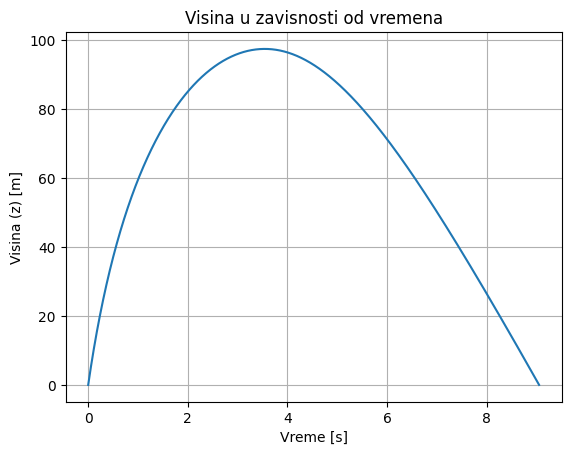

In [14]:
# Visina u zavisnosti od vremena:
figure()
plot(t[ii], r[ii, 2])
xlabel('Vreme [s]')
ylabel('Visina (z) [m]')
title('Visina u zavisnosti od vremena')
grid()


# Kretanje u x-z ravni

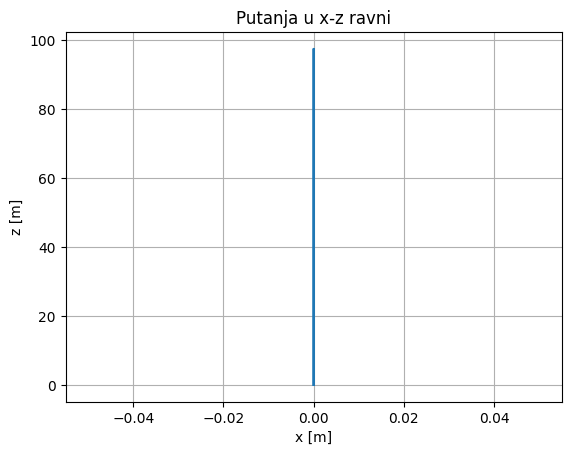

In [15]:
# Kretanje u x-z ravni:
figure()
plot(r[ii, 0], r[ii, 2])
xlabel('x [m]')
ylabel('z [m]')
title('Putanja u x-z ravni')
grid()

# 3D putanja projektila

Text(0.5, 0.92, '3D putanja projektila')

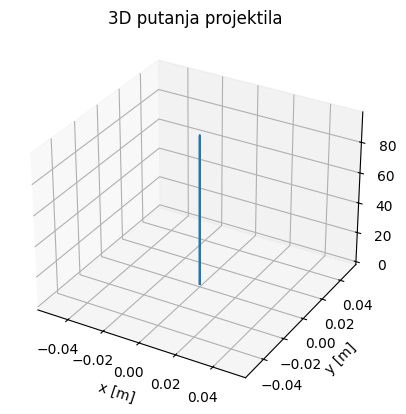

In [16]:
# 3D putanja projektila
fig = figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(r[ii, 0], r[ii, 1], r[ii, 2])
ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
ax.set_zlabel('z [m]')
ax.set_title('3D putanja projektila')

# Brzina u zavisnosti od vremena

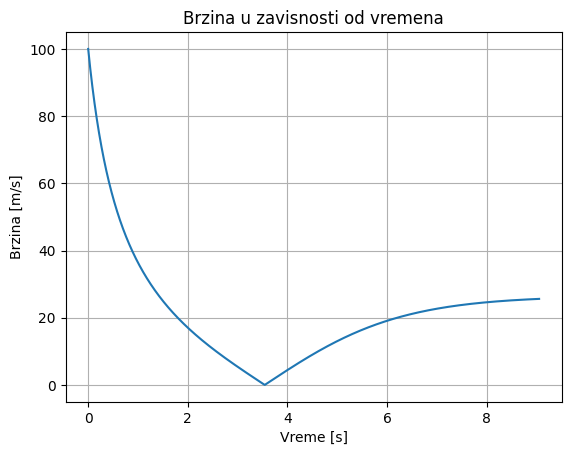

In [17]:
# Brzina u zavisnosti od vremena:
brzina = norm(v[ii], axis=1)
figure()
plot(t[ii], brzina)
xlabel('Vreme [s]')
ylabel('Brzina [m/s]')
title('Brzina u zavisnosti od vremena')
grid()


# Ubrzanje u zavisnotsti od vremena

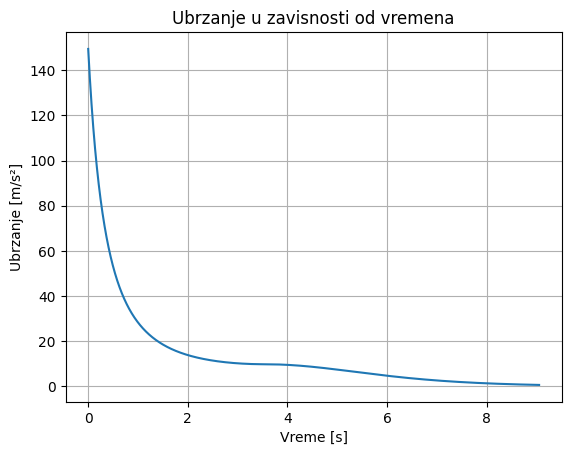

In [18]:
# Ubrzanje u zavisnosti od vremena
ubrzanje = norm(a[ii], axis=1)
figure()
plot(t[ii], ubrzanje)
xlabel('Vreme [s]')
ylabel('Ubrzanje [m/s²]')
title('Ubrzanje u zavisnosti od vremena')
grid()